In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
loan = pd.read_csv('/home/server/Documents/Kiva Crowdfund/kiva_loans.csv')
mpi_region_location = pd.read_csv('/home/server/Documents/Kiva Crowdfund/kiva_mpi_region_locations.csv')
theme_id = pd.read_csv('/home/server/Documents/Kiva Crowdfund/loan_theme_ids.csv')
theme_region = pd.read_csv('/home/server/Documents/Kiva Crowdfund/loan_themes_by_region.csv')

In [3]:
loan.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
mpi_region_location.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [5]:
theme_id.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [6]:
theme_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [7]:
print(loan.info(), mpi_region_location.info(), theme_region.info(), theme_id.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [8]:
loan_reg = pd.merge(loan, mpi_region_location).dropna()
loan_reg

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,borrower_genders,repayment_interval,date,LocationName,ISO,world_region,MPI,geo,lat,lon
0,653359,600.0,600.0,Machinery Rental,Services,to invest in working capital and to maintain g...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
1,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,NI,Nicaragua,Leon,NIO,...,male,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
2,653364,250.0,250.0,Fuel/Firewood,Retail,to buy firewood to offer to her customers,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
4,653396,800.0,800.0,Clothing Sales,Clothing,to invest in working capital to stock their bu...,NI,Nicaragua,Leon,NIO,...,"female, female, female",monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
5,653402,800.0,800.0,Grocery Store,Food,to invest in working capital and to supply her...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
6,653398,400.0,400.0,Clothing Sales,Clothing,To invest in working capital and stock her clo...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
7,653400,1925.0,1925.0,Grocery Store,Food,to stock her store.,NI,Nicaragua,Leon,NIO,...,"female, female, female, female, female, female...",irregular,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
8,653395,250.0,250.0,Clothing Sales,Clothing,to invest in working capital and to stock her ...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
9,653390,800.0,800.0,Grocery Store,Food,to invest in working capital and stock up her ...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
10,653377,600.0,600.0,Cosmetics Sales,Retail,to invest in working capital and stock up on c...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569


In [9]:
loan_reg.T

,0,1,2,4,5,6,7,8,9,10,...,52185,52186,52187,52188,52189,52191,52192,52193,52195,52196
id,653359,653373,653364,653396,653402,653398,653400,653395,653390,653377,...,1297103,1296923,1304580,1313379,1315632,1207215,1207220,1207690,1300428,1323945
funded_amount,600,1000,250,800,800,400,1925,250,800,600,...,425,850,850,825,1300,500,2075,1925,5050,10000
loan_amount,600,1000,250,800,800,400,1925,250,800,600,...,425,850,850,825,1300,500,2075,1925,5050,10000
activity,Machinery Rental,Grocery Store,Fuel/Firewood,Clothing Sales,Grocery Store,Clothing Sales,Grocery Store,Clothing Sales,Grocery Store,Cosmetics Sales,...,Mobile Transactions,Mobile Transactions,Mobile Transactions,Mobile Transactions,Cereals,Farm Supplies,Farm Supplies,Farm Supplies,Higher education costs,Weaving
sector,Services,Food,Retail,Clothing,Food,Clothing,Food,Clothing,Food,Retail,...,Services,Services,Services,Services,Food,Agriculture,Agriculture,Agriculture,Education,Arts
use,to invest in working capital and to maintain g...,to invest in working capital and to provide hi...,to buy firewood to offer to her customers,to invest in working capital to stock their bu...,to invest in working capital and to supply her...,To invest in working capital and stock her clo...,to stock her store.,to invest in working capital and to stock her ...,to invest in working capital and stock up her ...,to invest in working capital and stock up on c...,...,to pay for a kiosk for his start-up business a...,to generate capital for her start-up business ...,to attain a kiosk for her start-up business as...,to attain a kisok for her start-up business as...,to buy more rice and beans,to pay for high quality seeds and fertilisers ...,to buy high-quality seeds to plant and to sell.,"to purchase seeds, pesticides and fertilizers ...",to continue and finish her education in indust...,to develop a new product which will help creat...
country_code,NI,NI,NI,NI,NI,NI,NI,NI,NI,NI,...,MW,MW,MW,MW,MW,MZ,MZ,MZ,PE,BT
country,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,...,Malawi,Malawi,Malawi,Malawi,Malawi,Mozambique,Mozambique,Mozambique,Peru,Bhutan
region,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,...,Ntcheu,Ntcheu,Ntcheu,Ntcheu,Ntcheu,Manica,Manica,Manica,Tacna,Thimphu
currency,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,...,MWK,MWK,MWK,MWK,MWK,MZN,MZN,MZN,USD,USD


In [10]:
#Cleaning the gender borrower_gender
loan_reg['gender'] = loan_reg['borrower_genders'].apply(lambda x: x.split(',')[0])
loan_reg.head(100).T

,0,1,2,4,5,6,7,8,9,10,...,131,132,133,138,139,140,141,142,144,145
id,653359,653373,653364,653396,653402,653398,653400,653395,653390,653377,...,678733,678726,678718,679374,679368,679308,679311,679364,679309,679432
funded_amount,600,1000,250,800,800,400,1925,250,800,600,...,400,600,1375,800,1450,700,800,900,1900,475
loan_amount,600,1000,250,800,800,400,1925,250,800,600,...,400,600,1375,800,1450,700,800,900,1900,475
activity,Machinery Rental,Grocery Store,Fuel/Firewood,Clothing Sales,Grocery Store,Clothing Sales,Grocery Store,Clothing Sales,Grocery Store,Cosmetics Sales,...,Beverages,Clothing Sales,Clothing Sales,Textiles,Sewing,Food Production/Sales,Spare Parts,Cosmetics Sales,Food Production/Sales,Personal Housing Expenses
sector,Services,Food,Retail,Clothing,Food,Clothing,Food,Clothing,Food,Retail,...,Food,Clothing,Clothing,Arts,Services,Food,Retail,Retail,Food,Housing
use,to invest in working capital and to maintain g...,to invest in working capital and to provide hi...,to buy firewood to offer to her customers,to invest in working capital to stock their bu...,to invest in working capital and to supply her...,To invest in working capital and stock her clo...,to stock her store.,to invest in working capital and to stock her ...,to invest in working capital and stock up her ...,to invest in working capital and stock up on c...,...,to invest in working capital and supply her bu...,to have working capital to stock her business ...,to invest in working capital and stock her bus...,"buy supplies such as silk-screen watercolours,...",to invest in working capital and stock up her ...,invest in working capital and stock her busine...,invest in working capital and stock his busine...,to invest in working capital and buy stock for...,invest in working capital and stock their busi...,"to buy sand, cement, and labor"
country_code,NI,NI,NI,NI,NI,NI,NI,NI,NI,NI,...,NI,NI,NI,NI,NI,NI,NI,NI,NI,NI
country,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,...,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua
region,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,...,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon,Leon
currency,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,...,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO


In [11]:
loan_reg['gender'].value_counts(normalize=True) * 100

female    59.616709
male      40.383291
Name: gender, dtype: float64

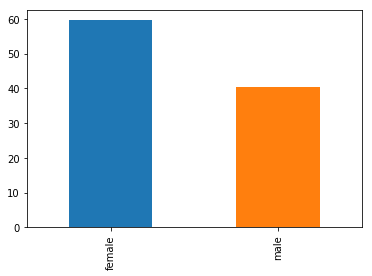

In [12]:
(loan_reg['gender'].value_counts(normalize=True) * 100).plot.bar(x='gender', y='percentage')

/home/server/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/server/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/server/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


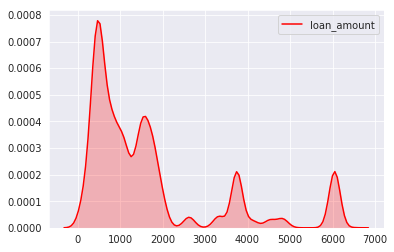

In [13]:
sns.set_style("darkgrid")
sns.kdeplot(loan_reg.loan_amount[loan_reg.loan_amount], color='r', shade=True);

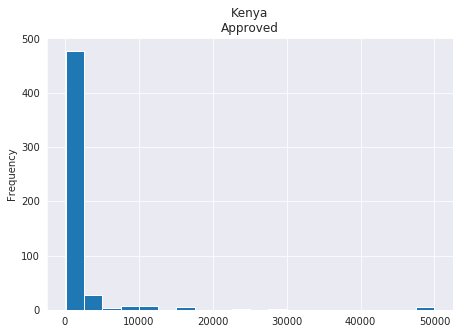

In [14]:
country = 'Kenya'

plt.figure(figsize=(16, 5))
plt.subplot(1,2, 1)
loan_reg[(loan_reg.funded_amount != 0) & (loan_reg.country == country)]['loan_amount'].plot.hist(bins=20, 
                                                                                        title='Kenya\nApproved');
    

/home/server/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/server/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/server/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


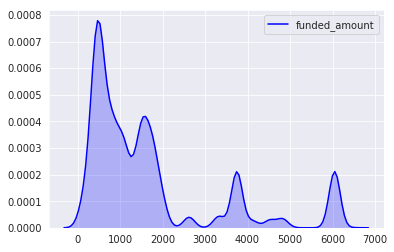

In [15]:
sns.kdeplot(loan_reg.funded_amount[loan_reg.funded_amount], color='b', shade=True);

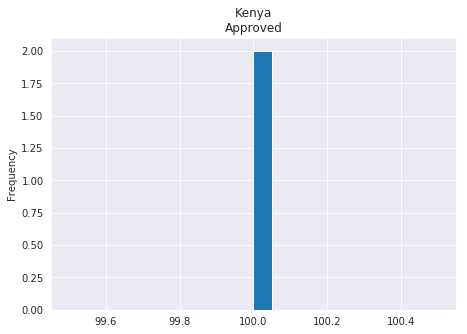

In [16]:
country = 'Kenya'

plt.figure(figsize=(16, 5))
plt.subplot(1,2, 1)
loan_reg[(loan_reg.funded_amount == 100) & (loan_reg.country == country)]['loan_amount'].plot.hist(bins=20, 
                                                                                        title='Kenya\nApproved');
    

In [17]:
##Proportion Plot
def proportion_plot(column, title='', figsize=(15, 5), top=20):
    value_count = (100*column.value_counts()/column.shape[0])[:top]
    plt.subplots(figsize=figsize)
    sns.set_style("whitegrid")
    g = sns.barplot(x=value_count.index, y=value_count.values)
    plt.title(title, size=20)
    plt.xlabel(column.name, size=15); plt.ylabel('percentage', size=15)
    plt.xticks(size=12, rotation=90); plt.yticks(size=15)


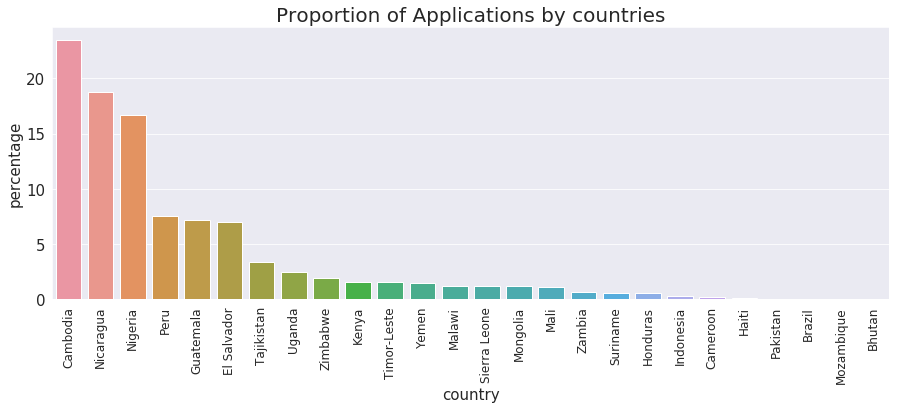

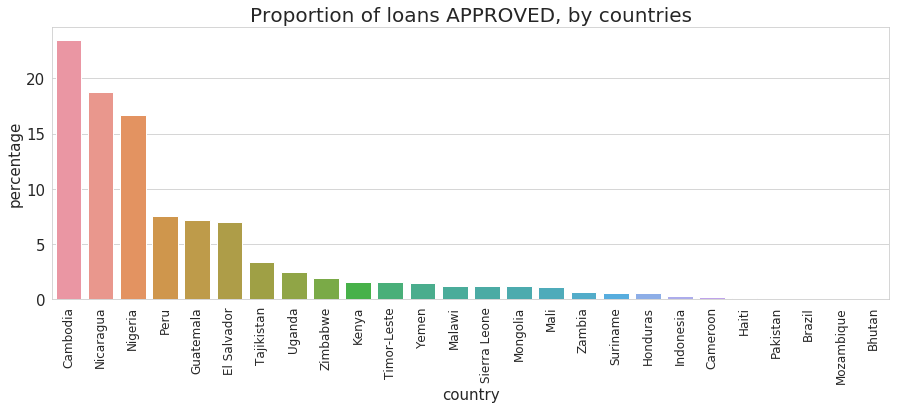

In [18]:
proportion_plot(loan_reg.country, 
                title='Proportion of Applications by countries', 
                figsize=(15, 5), top=30)


proportion_plot(loan_reg[loan_reg.funded_amount != 0].country, 
                title='Proportion of loans APPROVED, by countries', 
                figsize=(15, 5), top=30)


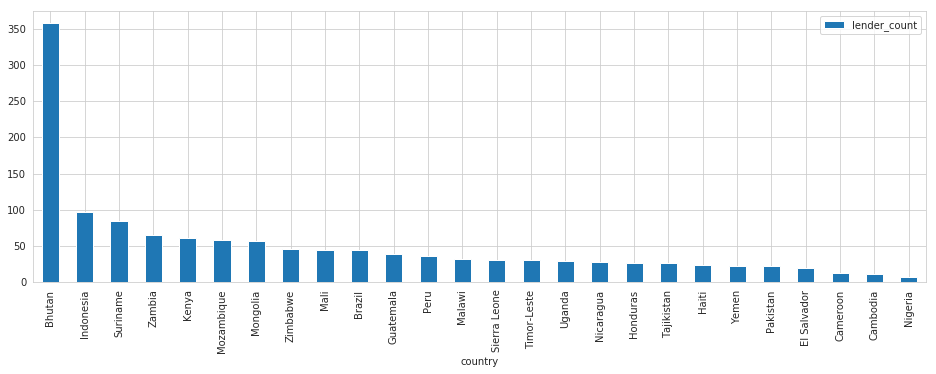

In [19]:
loan_reg.groupby(['country']).agg({'lender_count':'mean'}).sort_values(by='lender_count',
                                                                       ascending=False).plot.bar(figsize=(16, 5))

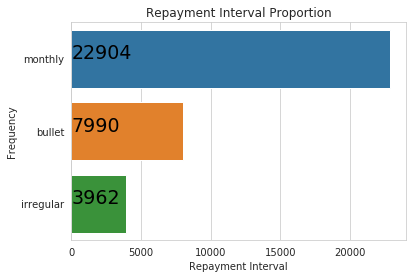

In [20]:
repayment = loan_reg.repayment_interval.value_counts()
sns.barplot(x = repayment.values, y = repayment.index);
for i, v in enumerate(repayment.values):
    plt.text(0.8, i, v, color='k',fontsize=19)
plt.xlabel('Repayment Interval')
plt.ylabel('Frequency')
plt.title('Repayment Interval Proportion');

Part of my visualizations are not my original work but a try outs. 

Reference Gaurav Modi
10 Apr 2018
Data Source: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding/data
Notebook on Kaggle: https://www.kaggle.com/modigaurav/exploration-of-kiva